In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import keras
from keras import backend as K
from keras.layers import Input, Dense, Dropout
from keras.layers.advanced_activations import PReLU
from keras.models import Model
from keras.optimizers import Adamax
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


Using TensorFlow backend.


In [2]:

# Model fixed parameters
NInputs = 4 # Number of features (model inputs)
NOutputs = 1 # Number of targets (model outputs)



In [3]:

# Import training data (model inputs & outputs)
Feature_Train = pd.read_csv('processed_data/SL_Train_Features.csv', header = 0)
Feature_Train = Feature_Train[['GR', 'RHOB','NPHI','RPCELM_l10']]

Feature_Train = np.asarray(Feature_Train)
print(Feature_Train.shape)
Target_Train = pd.read_csv('processed_data/SL_Train_Target.csv', header = 0)
Target_Train = Target_Train[['SW']]
Target_Train = np.asarray(Target_Train)
print(Target_Train.shape)
print(Feature_Train[0])


# Import validation data (model inputs & outputs)
Feature_Val = pd.read_csv('processed_data/SL_Val_Features.csv', header = 0)
Feature_Val = Feature_Val[['GR', 'RHOB','NPHI','RPCELM_l10']]

Feature_Val = np.asarray(Feature_Val)
print(Feature_Val.shape)
Target_Val = pd.read_csv('processed_data/SL_Val_Target.csv', header = 0)
Target_Val = Target_Val[['SW']] 
Target_Val = np.asarray(Target_Val)
print(Target_Val.shape)



# Import test data (model inputs & outputs)
Feature_Test = pd.read_csv('processed_data/SL_Test_Features.csv', header = 0)
Feature_Test = Feature_Test[['GR', 'RHOB','NPHI','RPCELM_l10']]

Feature_Test = np.asarray(Feature_Test)
print(Feature_Test.shape)
Target_Test = pd.read_csv('processed_data/SL_Test_Target.csv', header = 0)
Target_Test = Target_Test[['SW']] 
Target_Test = np.asarray(Target_Test)
print(Target_Test.shape)



(14061, 4)
(14061, 1)
[21.6229      2.288       0.1833     -0.45618019]
(6027, 4)
(6027, 1)
(8882, 4)
(8882, 1)


In [4]:
# Defining neural network

rate = 0.1

def nn():
    NN_ip = Input(shape=(NInputs,))
    x = Dense(1000)(NN_ip)
    x = PReLU()(x)
    x = Dropout(rate)(x)
    x = Dense(1000)(x)
    x = PReLU()(x)
    x = Dropout(rate)(x)
    NN_op = Dense(NOutputs)(x)
       
    NN_model = Model(NN_ip, NN_op)
    
    def loss_mse(true, pred):
        mean = pred[:, :NOutputs]
        return K.mean(K.square(true - mean), -1)

    def metric_mse(y_true, y_pred):
        mean = y_pred[:, :NOutputs]
        return K.mean(K.square(y_true - mean), -1)
    
    opt = Adamax(1e-3)
    
    NN_model.compile(loss = loss_mse, optimizer = opt, metrics = [metric_mse])
    
    return NN_model

NN = nn()
NN.summary()


Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 1000)              1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 1000)              1000      
_____________________________________________________

Instructions for updating:
Use tf.cast instead.
Train on 14061 samples, validate on 6027 samples
Epoch 1/300
14061/14061 [==============================] - 2s 156us/step - loss: 62.2386 - metric_mse: 62.2386 - val_loss: 5.5008 - val_metric_mse: 5.5008
Epoch 2/300
14061/14061 [==============================] - 2s 127us/step - loss: 4.6477 - metric_mse: 4.6477 - val_loss: 1.2422 - val_metric_mse: 1.2422
Epoch 3/300
14061/14061 [==============================] - 1s 103us/step - loss: 0.8958 - metric_mse: 0.8958 - val_loss: 1.1538 - val_metric_mse: 1.1538
Epoch 4/300
14061/14061 [==============================] - 2s 135us/step - loss: 0.5177 - metric_mse: 0.5177 - val_loss: 0.0881 - val_metric_mse: 0.0881
Epoch 5/300
14061/14061 [==============================] - 2s 114us/step - loss: 0.3993 - metric_mse: 0.3993 - val_loss: 0.0806 - val_metric_mse: 0.0806
Epoch 6/300
14061/14061 [==============================] - 2s 123us/step - loss: 0.2956 - metric_mse: 0.2956 - val_loss: 0.2220 - val_me

14061/14061 [==============================] - 2s 113us/step - loss: 0.1760 - metric_mse: 0.1760 - val_loss: 0.0591 - val_metric_mse: 0.0591
Epoch 53/300
14061/14061 [==============================] - 2s 113us/step - loss: 0.1753 - metric_mse: 0.1753 - val_loss: 0.0509 - val_metric_mse: 0.0509
Epoch 54/300
14061/14061 [==============================] - 2s 125us/step - loss: 0.1755 - metric_mse: 0.1755 - val_loss: 0.0750 - val_metric_mse: 0.0750
Epoch 55/300
14061/14061 [==============================] - 2s 121us/step - loss: 0.1734 - metric_mse: 0.1734 - val_loss: 0.0612 - val_metric_mse: 0.0612
Epoch 56/300
14061/14061 [==============================] - 2s 128us/step - loss: 0.1712 - metric_mse: 0.1712 - val_loss: 0.0422 - val_metric_mse: 0.0422
Epoch 57/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.1744 - metric_mse: 0.1744 - val_loss: 0.0830 - val_metric_mse: 0.0830
Epoch 58/300
14061/14061 [==============================] - 2s 127us/step - loss: 0.1700 

14061/14061 [==============================] - 2s 113us/step - loss: 0.1121 - metric_mse: 0.1121 - val_loss: 0.0232 - val_metric_mse: 0.0232
Epoch 106/300
14061/14061 [==============================] - 2s 115us/step - loss: 0.1105 - metric_mse: 0.1105 - val_loss: 0.0396 - val_metric_mse: 0.0396
Epoch 107/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.1209 - metric_mse: 0.1209 - val_loss: 0.0832 - val_metric_mse: 0.0832
Epoch 108/300
14061/14061 [==============================] - 2s 117us/step - loss: 0.1237 - metric_mse: 0.1237 - val_loss: 0.0240 - val_metric_mse: 0.0240
Epoch 109/300
14061/14061 [==============================] - 2s 113us/step - loss: 0.1117 - metric_mse: 0.1117 - val_loss: 0.0585 - val_metric_mse: 0.0585
Epoch 110/300
14061/14061 [==============================] - 2s 117us/step - loss: 0.1045 - metric_mse: 0.1045 - val_loss: 0.0520 - val_metric_mse: 0.0520
Epoch 111/300
14061/14061 [==============================] - 2s 113us/step - loss: 0

Epoch 158/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0621 - metric_mse: 0.0621 - val_loss: 0.0333 - val_metric_mse: 0.0333
Epoch 159/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0595 - metric_mse: 0.0595 - val_loss: 0.0245 - val_metric_mse: 0.0245
Epoch 160/300
14061/14061 [==============================] - 2s 118us/step - loss: 0.0631 - metric_mse: 0.0631 - val_loss: 0.0535 - val_metric_mse: 0.0535
Epoch 161/300
14061/14061 [==============================] - 2s 119us/step - loss: 0.0621 - metric_mse: 0.0621 - val_loss: 0.0274 - val_metric_mse: 0.0274
Epoch 162/300
14061/14061 [==============================] - 2s 118us/step - loss: 0.0591 - metric_mse: 0.0591 - val_loss: 0.0274 - val_metric_mse: 0.0274
Epoch 163/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0587 - metric_mse: 0.0587 - val_loss: 0.0314 - val_metric_mse: 0.0314
Epoch 164/300
14061/14061 [==============================] - 2s 114us/

Epoch 211/300
14061/14061 [==============================] - 2s 115us/step - loss: 0.0416 - metric_mse: 0.0416 - val_loss: 0.0237 - val_metric_mse: 0.0237
Epoch 212/300
14061/14061 [==============================] - 2s 115us/step - loss: 0.0410 - metric_mse: 0.0410 - val_loss: 0.0293 - val_metric_mse: 0.0293
Epoch 213/300
14061/14061 [==============================] - 2s 114us/step - loss: 0.0424 - metric_mse: 0.0424 - val_loss: 0.0215 - val_metric_mse: 0.0215
Epoch 214/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0401 - metric_mse: 0.0401 - val_loss: 0.0245 - val_metric_mse: 0.0245
Epoch 215/300
14061/14061 [==============================] - 2s 119us/step - loss: 0.0403 - metric_mse: 0.0403 - val_loss: 0.0229 - val_metric_mse: 0.0229
Epoch 216/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0397 - metric_mse: 0.0397 - val_loss: 0.0234 - val_metric_mse: 0.0234
Epoch 217/300
14061/14061 [==============================] - 2s 115us/

Epoch 264/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0364 - metric_mse: 0.0364 - val_loss: 0.0221 - val_metric_mse: 0.0221
Epoch 265/300
14061/14061 [==============================] - 2s 116us/step - loss: 0.0338 - metric_mse: 0.0338 - val_loss: 0.0251 - val_metric_mse: 0.0251
Epoch 266/300
14061/14061 [==============================] - 2s 113us/step - loss: 0.0336 - metric_mse: 0.0336 - val_loss: 0.0316 - val_metric_mse: 0.0316
Epoch 267/300
14061/14061 [==============================] - 2s 125us/step - loss: 0.0333 - metric_mse: 0.0333 - val_loss: 0.0220 - val_metric_mse: 0.0220
Epoch 268/300
14061/14061 [==============================] - 2s 113us/step - loss: 0.0366 - metric_mse: 0.0366 - val_loss: 0.0408 - val_metric_mse: 0.0408
Epoch 269/300
14061/14061 [==============================] - 2s 115us/step - loss: 0.0344 - metric_mse: 0.0344 - val_loss: 0.0264 - val_metric_mse: 0.0264
Epoch 270/300
14061/14061 [==============================] - 2s 114us/

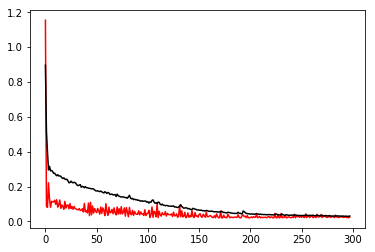

In [5]:
NN = nn()

history = NN.fit(Feature_Train, Target_Train, 
                     epochs = 300, 
                     batch_size = int(Feature_Train.shape[0]/8), 
                     shuffle = True, 
                     validation_data = (Feature_Val, Target_Val))
    
plt.plot(history.history['val_loss'][2:],'r')
plt.plot(history.history['loss'][2:],'k')


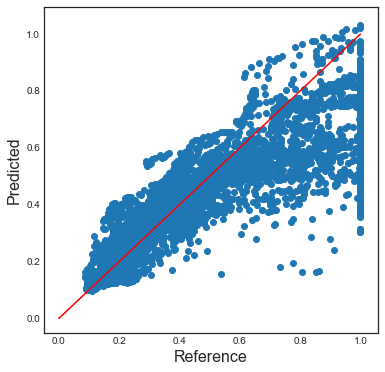

In [6]:
#3.1 Plot the predicted saturation versus the Interpreted saturation
PredictedTarget = NN.predict(Feature_Test)
plt.figure(figsize = (6,6))
plt.style.use('seaborn-white')
plt.scatter(Target_Test, PredictedTarget)
plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), color = 'r', alpha = 1)
plt.xlabel('Reference', FontSize = 16)
plt.ylabel('Predicted', FontSize = 16)
plt.show()


In [7]:

SaveWeights = 0
LoadWeights = 0
localmodelname_h5 = ('NNWeights.h5')

if SaveWeights:
    NN.save_weights(localmodelname_h5) # saving model parameters

if LoadWeights:
    NN = nn()
    NN.load_weights(localmodelname_h5)



In [8]:
output_df = pd.read_csv('processed_data/SL_Test_Target.csv', header = 0)
type(output_df)
output_df.insert( 4,"PredictedSw", PredictedTarget)
output_df
output_df.to_csv('processed_data/SL_PredictedSw.csv', index=True)

